In [16]:
## Section 1 ##

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 
from sklearn.preprocessing import StandardScaler 

In [3]:
pd.set_option("expand_frame_repr", False) 
df= pd.read_csv('Student Mental health.csv')

# 1.1 Name your columns as follows [2 Marks]
df.columns = ['Timestamp','Gender','Age','Course','Year','CGPA','Status','Depression','Anxiety','Panic','Treatment'] 
from sklearn import preprocessing

In [4]:
df.head()

,Timestamp,Gender,Age,Course,Year,CGPA,Status,Depression,Anxiety,Panic,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [5]:
# 1.2 Use LabelEncoder to transform the following categorical variables into numerical values: [3 Marks]
lab_encoder = preprocessing.LabelEncoder()     
df['Timestamp'] = lab_encoder.fit_transform(df['Timestamp']) 
df['Gender'] = lab_encoder.fit_transform(df['Gender']) 
df['Status'] = lab_encoder.fit_transform(df['Status']) 
df['Depression'] = lab_encoder.fit_transform(df['Depression']) 
df['Anxiety'] = lab_encoder.fit_transform(df['Anxiety']) 
df['Panic'] = lab_encoder.fit_transform(df['Panic']) 
df['Treatment'] = lab_encoder.fit_transform(df['Treatment']) 

C:\Users\Dihan\AppData\Local\Temp\ipykernel_25156\3405778445.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Timestamp', y='CGPA', palette='Set1')


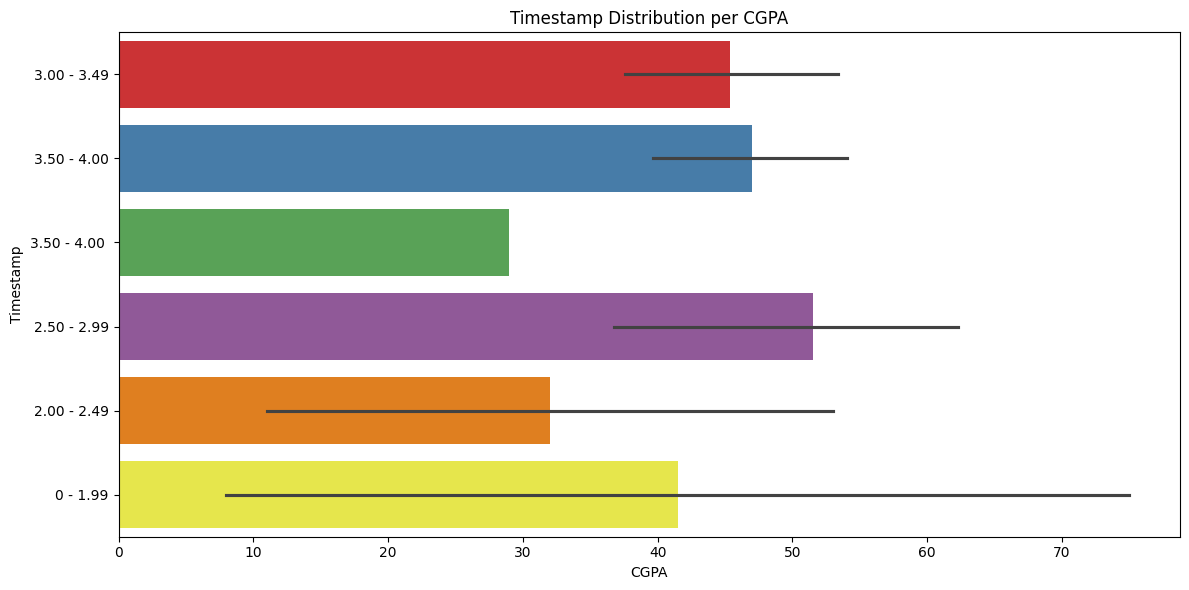

In [6]:
# 1.3 Create a bar plot to show the course distribution per CGPA. Add labels and a title to display the plot. [5 Marks]

# Set the figure size 
plt.figure(figsize=(12, 6)) 
#Note: Female =0 and Male=1 
# Create a bar plot to show the course distribution per CGPA 
sns.barplot(data=df, x='Timestamp', y='CGPA', palette='Set1') 
# Add labels and title 
plt.xlabel('CGPA') 
plt.ylabel('Timestamp') 
plt.title('Timestamp Distribution per CGPA') 
# Display the plot 
plt.tight_layout()
plt.show()

C:\Users\Dihan\AppData\Local\Temp\ipykernel_25156\131635656.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtered, x='Timestamp', y='CGPA', palette='Set1')


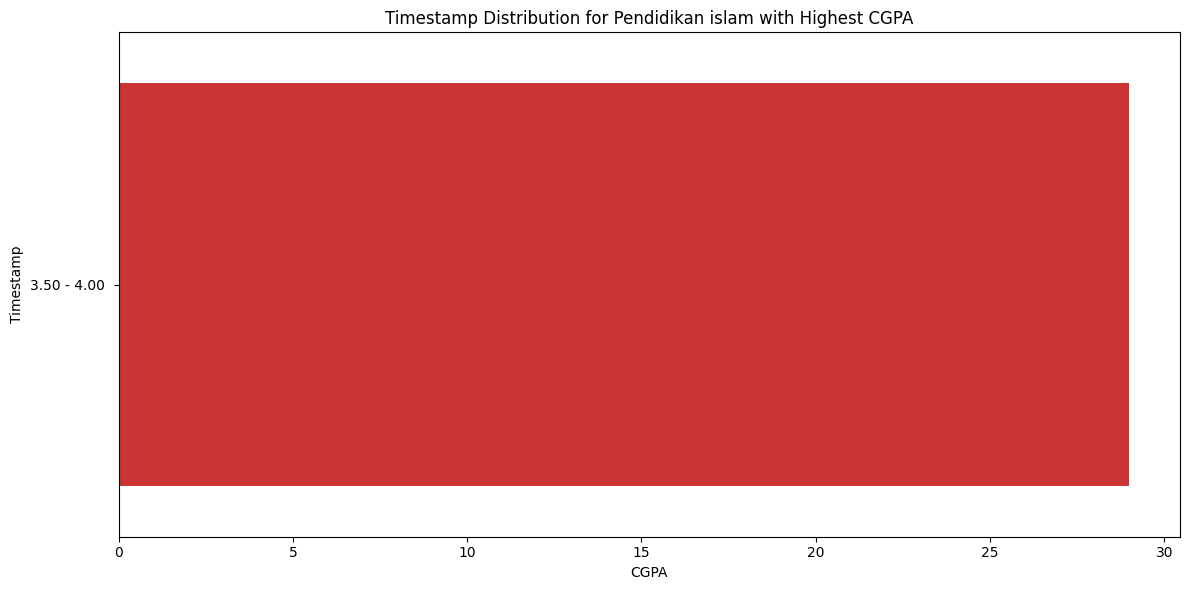

In [7]:
# 1.4 Create a bar plot to show the course distribution with the highest CGPA. [5 Marks]

# Find the course with the highest CGPA 
course_with_highest_cgpa = df[df['CGPA'] == df['CGPA'].max()]['Course'].values[0] 
# Filter the DataFrame to include only the rows with the highest CGPA course 
df_filtered = df[df['Course'] == course_with_highest_cgpa] 
# Set the figure size 
plt.figure(figsize=(12, 6)) 
# Create a bar plot to show the course distribution per CGPA 
sns.barplot(data=df_filtered, x='Timestamp', y='CGPA', palette='Set1')
# Add labels and title 
plt.xlabel('CGPA') 
plt.ylabel('Timestamp') 
plt.title(f'Timestamp Distribution for {course_with_highest_cgpa} with Highest CGPA') 
# Display the plot 
plt.tight_layout() 
plt.show() 

In [10]:
# 1.5 Group the data by 'Course' and calculate the sum of 'Depression' to find the course with the most depressed students as well 
# as the number of depressed students. [5 Marks]

# Group the data by 'Course' and calculate the sum of 'Depression' 
course_depression_counts = df.groupby('Course')['Depression'].sum() 
# Find the course with the most depressed students 
most_depressed_course = course_depression_counts.idxmax() 
most_depressed_students = course_depression_counts.max() 
print(f"The course with the most depressed students is '{most_depressed_course}' with {most_depressed_students} depressed students.")

The course with the most depressed students is 'Engineering' with 7 depressed students.


In [11]:
# 1.6 Find the most depressed gender in the course with the most depressed students. [5 Marks]

# Group the data by 'Course' and calculate the sum of 'Depression' 
course_depression_counts = df.groupby('Course')['Depression'].sum() 
# Find the course with the most depressed students 
most_depressed_course = course_depression_counts.idxmax() 
# Filter the DataFrame to include only the students in the most depressed course 
most_depressed_students_df = df[df['Course'] == most_depressed_course] 
# Group the filtered data by 'Gender' and calculate the sum of 'Depression' 
gender_depression_counts = most_depressed_students_df.groupby('Gender')['Depression'].sum() 
# Find the gender with the most depressed students 
most_depressed_gender = gender_depression_counts.idxmax() 
print(f"The most depressed gender among students in the '{most_depressed_course}' course is '{most_depressed_gender}'.") 

The most depressed gender among students in the 'Engineering' course is '0'.


In [13]:
# 1.7 Find the course and gender with the most students wanting treatment. [10 Marks]

# Filter the DataFrame to include only students who want treatment (Treatment == 1) 
students_wanting_treatment = df[df['Treatment'] == 1] 
# Group the filtered data by 'Course' and 'Gender' and calculate the count of students wanting treatment 
treatment_counts = students_wanting_treatment.groupby(['Course', 'Gender']).size().reset_index(name='Count') 
# Find the course and gender with the most students wanting treatment 
most_wanted_course_gender = treatment_counts[treatment_counts['Count'] == treatment_counts['Count'].max()] 
most_wanted_course = most_wanted_course_gender['Course'].values[0] 
most_wanted_gender = most_wanted_course_gender['Gender'].values[0] 
print(f"The course and gender that need the most treatment are '{most_wanted_course}' and '{most_wanted_gender}'.") 

The course and gender that need the most treatment are 'ALA' and '0'.


In [ ]:
## Section 2 ##

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [18]:
# 1.1 Data Exploration: Data loading and display [2 Marks]
# 2 marks in Total
# 1 mark for the data reading
# 1 mark to display the data

data = pd.read_csv('property_data.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,6.48,22.0


In [20]:
# 1.2 Data Exploration: Perform descriptive analysis on data [1 Mark]
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,67.982016,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.532006,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,0.000000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,43.475000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,93.875000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


C:\Users\Dihan\AppData\Local\Temp\ipykernel_25156\2668270047.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MEDV'], bins=40)


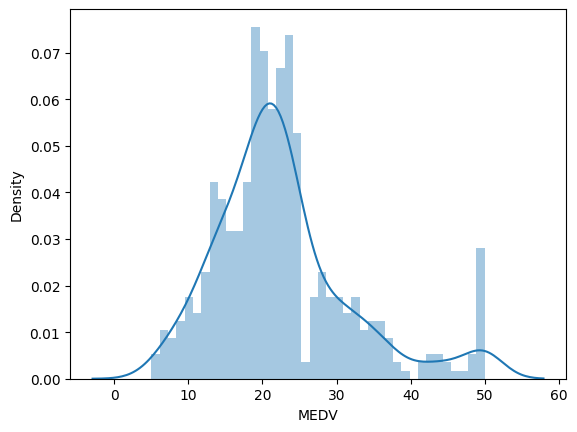

In [21]:
# 1.3 Data Visualization: Visualize the Property Price density [3 Marks]
# 1 mark for histogram displaying property price
# 1 mark for 40 bins
# 1 mark for displaying the normality distribution curve
plt.figure()
sns.distplot(data['MEDV'], bins=40)
plt.show()

In [27]:
# 1.4 Statistical Analysis: Correlation [8 Marks]

# 1 mark
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.336388,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.551745,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.614987,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.091026,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.691167,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.239548,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.336388,-0.551745,0.614987,0.091026,0.691167,-0.239548,1.000000,-0.718843,0.415344,0.467811,0.241226,0.576959,-0.355519
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.718843,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.415344,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.467811,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


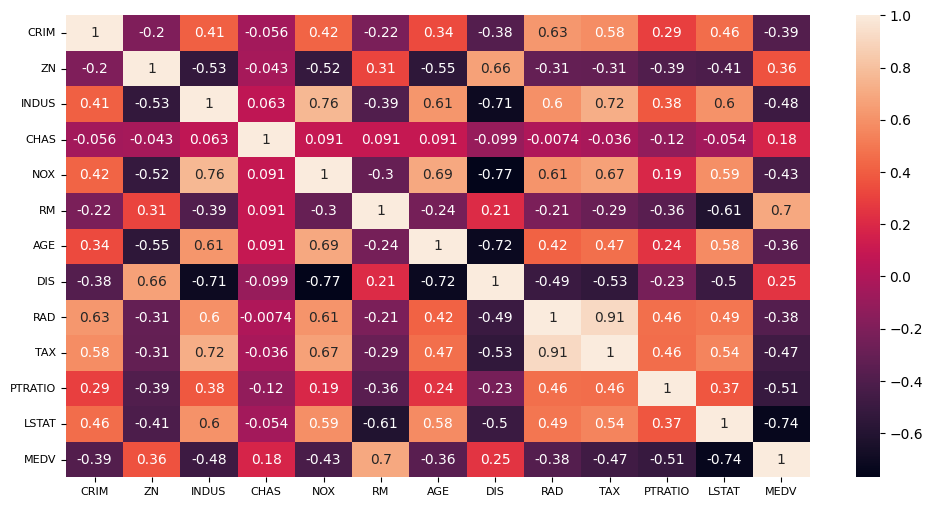

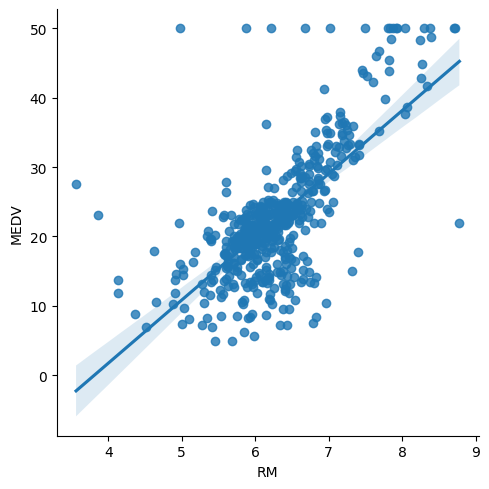

In [28]:
# 1.4 Statistical Analysis: Correlation -Continued 

# marks in Total 6
# 2 marks for figure with width of 12 and height of 6
# 2 marks for the heatmap correlation figures displayed
# 1 mark for x axis labels with size of 8
# 1 mark for y axis labels with size of 8
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

# 1 mark
sns.lmplot(x='RM', y='MEDV', data=data)
plt.show()

In [30]:
# 1.5 Machine Learning: Training and Test Dataset Split [5 Marks]

# 5 marks in Total
# 1 mark for the target variable (MEDV)
# 1 mark for the features variable
# 3 marks to create the train,
property_prices = data['MEDV']
features = data.drop('MEDV', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, property_prices,
                                                    test_size=0.2, random_state=10)

In [31]:
# 1.6 Machine Learning: Multivariable Regression [5 Marks]

# 5 marks in Total
# 1 mark for fitting the relevant data to the regression model
# 1 mark for displaying the training data R-squared
# 1 mark for displaying the test data R-squared
# 1 mark for displaying the regression intercept
# 1 mark for displaying the regression coefficient per feature
regr = LinearRegression()
regr.fit(X_train, y_train)

print( 'Training data r-squared: ', regr.score(X_train, y_train))
print( 'Test data r-squared: ', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared:  0.73850632682846
Test data r-squared:  0.6814654355654765
Intercept 43.147265945861065


,coef
CRIM,-0.142638
ZN,0.064702
INDUS,-0.023881
CHAS,2.249720
NOX,-17.426335
RM,2.881629
AGE,0.017047
DIS,-1.535008
RAD,0.280364
TAX,-0.012449


In [34]:
# 1.7 Data Transformations: Log Transformation [6 Marks]

# 1 mark
data['MEDV'].skew()

1.1080984082549072

In [35]:
# 1.7 - Continued

# 2 marks in Total
# 1 mark for log property price
# 1 mark for checking the skew of the data
y_log = np.log(data['MEDV'])
y_log.skew()

-0.33032129530987864

C:\Users\Dihan\AppData\Local\Temp\ipykernel_25156\794692049.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_log)


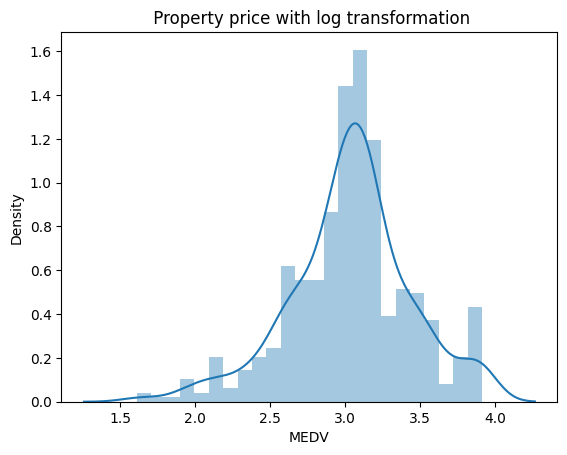

In [36]:
# 1.7 - Continued

# 3 marks in Total
# 1 mark for histogram displaying property price
# 1 mark for displaying Ithe Log transformation normality distribution curve
# 1 mark for a title: 'Property price with log transformation'
sns.distplot(y_log)
plt.title(f' Property price with log transformation')
plt.show()

In [38]:
# 1.8 Machine Learning: Log Transformation Regression Model [5 Marks]

# 5 marks in rotaL
# 1 mark for fitting the relevant data to the log transformation regression model
# 1 mark for displaying the Log transformation training data R-squared
# 1 mark for displaying the Log transformation test data R-squared
# 1 mark for displaying the Log transformation regression intercept
# 1 mark for displaying the Log transformation regression coefficient per feature

property_prices = np.log(data['MEDV'])
features = data.drop('MEDV', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, property_prices,
                                                    test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print( 'Training data r-squared: ',regr.score(X_train, y_train))
print( 'Test data r-squared: ', regr.score(X_test, y_test))

print( 'Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared:  0.7813696598412383
Test data r-squared:  0.7614162164429262
Intercept 4.356977075487658


,coef
CRIM,-0.011315
ZN,0.001626
INDUS,0.001301
CHAS,0.093786
NOX,-0.744787
RM,0.064057
AGE,0.000619
DIS,-0.050783
RAD,0.013421
TAX,-0.000660
